# Homework 2

## Pair Programming Group Number: 4
## Members of Team: Alex Chiu, Ella Jiang

#### Practicing using numpy to do math, and more visualizations

More fun using the numerical package, numpy, a touch of pandas, and exercising your math vocabulary. 

In [18]:
# Your imports
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Enable inline mode for matplotlib so that Jupyter displays graphs
%matplotlib inline

## Question 1 - Discrete PDF
Create a vector of 1000 random numbers from a Normal distribution with mean 5 and standard deviation 10 and plot the discrete probability density function using a histogram.  You should use [numpy random normal](https://numpy.org/doc/stable/reference/random/generated/numpy.random.normal.html) to create the vector. Always label your axes and give your plots titles (this holds for all questions). 

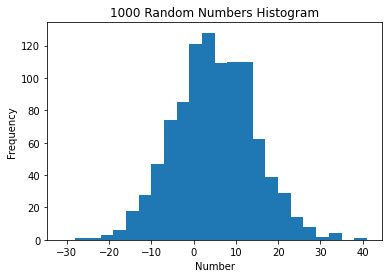

In [19]:
random1k = np.random.normal(5,10,1000)
bins = []

for i in range(25):
    bins.append(5+3*(i-12))

plt.hist(random1k,bins)
plt.title("1000 Random Numbers Histogram")
plt.xlabel("Number")
plt.ylabel("Frequency")
plt.show()

## Question 2 - Discrete CDF

Create a discrete cumulative density function plot using the same vector as the last question using a line graph
Annotate the point, $x$, where 80% of the data < $x$ and 20% of the data is greater than $x$.  If can use the matplotlib pyplot function [plot](https://matplotlib.org/3.3.3/api/_as_gen/matplotlib.pyplot.plot.html) to the line, and to draw a star at the point $x$.  Use the [legend](https://matplotlib.org/3.3.3/api/_as_gen/matplotlib.pyplot.legend.html) function to annotate the graph. 

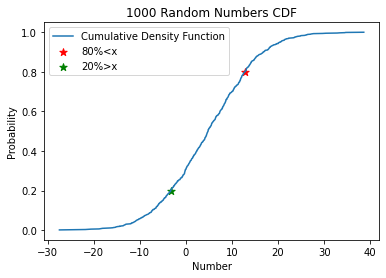

In [20]:
sorted1k = np.sort(random1k)
cdf = []
for i in range(len(sorted1k)):
    cdf.append((i+1)/1000.)
plt.plot(sorted1k,cdf)
plt.title("1000 Random Numbers CDF")
plt.xlabel("Number")
plt.ylabel("Probability")
plt.scatter(sorted1k[800-1],cdf[800-1],marker="*",c="r",s=60)
plt.scatter(sorted1k[200-1],cdf[200-1],marker="*",c="g",s=60)
plt.legend(["Cumulative Density Function","80%<x","20%>x"])
plt.show()
#print (cdf[800-1])
#print (cdf[200-1])

## Question 3 - Univariate Analysis

Load in the data from melb_data.csv into a pandas DataFrame.  Create a box and whisker graph comparing the prices in the suburbs:
  - Reservoir         
  - Richmond          
  - Bentleigh East
  
You should use the [boxplot](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.boxplot.html) function, with the parameter `groupby`. 

In [21]:
#df = pd.read_csv("melb_data.csv")
#boxwhis = df[df["Suburb"]=="Reservoir"]["Price"]
#richmond = df[df["Suburb"]=="Richmond"]["Price"]
#bentleigh = df[df["Suburb"]=="Bentleigh East"]["Price"]
#plt.boxplot([reservoir,richmond,bentleigh],labels = ["Reservoir","Richmond","Bentleigh East"] )
#plt.show()

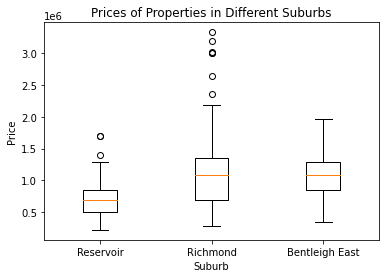

In [22]:
df = pd.read_csv("melb_data.csv")
groupbySub = df.groupby("Suburb")["Price"]

plt.boxplot([groupbySub.get_group("Reservoir"),groupbySub.get_group("Richmond"),groupbySub.get_group("Bentleigh East")],labels = ["Reservoir","Richmond","Bentleigh East"] )
plt.xlabel("Suburb")
plt.ylabel("Price")
plt.title("Prices of Properties in Different Suburbs")
plt.show()

## Question 4 - Rotation with Matrices

Consider the vectors:
  - $\alpha$ which begins at (0,0) and ends at (1,1)
  - $\beta$ which begins at (1,1) and ends at (0,1)
  
Draw $\alpha$ and $\beta$ using a line graph using a different color for each vector.

Now, using matrix multiplication rotate the vectors 45 degrees (clockwise or counter-clockwise, you choose!) and draw the result.  You must use numpy's [matmul](https://numpy.org/doc/stable/reference/generated/numpy.matmul.html) to accomplish the rotation. Numpy also has functions for `sin` and `cos`.  You should also get [pi](https://numpy.org/doc/stable/reference/constants.html?highlight=pi#numpy.pi) from the numpy package. 

In [23]:
alpha = np.array([[1-0],[1-0]])
beta = np.array([[0-1],[1-1]])
theta = np.pi/4
rot = [[np.cos(theta),-np.sin(theta)],[np.sin(theta),np.cos(theta)]]


In [24]:
alpha = np.matmul(rot,alpha)
beta = np.matmul(rot,beta)

In [25]:
print("Rotated alpha = [ " + str(alpha[0][0]) + " , " + str(alpha[1][0]) + " ]")
print("Rotated beta = [ " + str(beta[0][0]) + " , " + str(beta[1][0]) + " ]")
print("Both rotations are counter clockwise")

Rotated alpha = [ 0.0 , 1.4142135623730951 ]
Rotated beta = [ -0.7071067811865476 , -0.7071067811865476 ]
Both rotations are counter clockwise


## Question 5 - Solving Systems of Equations with Matrices

Consider the following system of equations:
  - $2x +  y + z = 5$
  - $4x - 6y     = -2$
  - $-2x + 7y + 2z = 9$
  
Convert the coefficients of the system of equations to a matrix, $A$, where the first column contains the $x$ coefficients, the second column contains the $y$ coefficients, and the third column contains the $z$ coefficients. 
Covert the values on the right hand side to a (3,1) vector, $b$, (make sure you keep all the numbers in order.  Now, solve for $(x,y,z)$ by inverting $A$ and multiplying by $b$, eg, $A^{-1} * b$. 

Use the numpy [linear algebra inverse function](https://numpy.org/doc/stable/reference/generated/numpy.linalg.inv.html) to find $A^{-1}$.

In [26]:
A = np.array([[2,1,1],[2,-6,0],[-2,7,2]])
B = np.array([[5],[-2],[9]])
ans = np.matmul(np.linalg.inv(A),B)
print("x = " +str(ans[0][0]) + "\ny = "+str(ans[1][0]) + "\nz = "+str(ans[2][0]))

x = 0.6153846153846154
y = 0.5384615384615387
z = 3.2307692307692304


In [27]:
#np.matmul(A,ans)